In [1]:
#!pip install pyplotbrookings
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn import datasets

import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from matplotlib.transforms import ScaledTranslation
import pyplotbrookings.pyplotbrookings as ppb

plt.rcParams['grid.linestyle'] = "dotted"

In [2]:
X, t = make_swiss_roll(n_samples=2000, random_state=42)

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=100)
k_cluster = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, n_init=100)
s_cluster = spectral.fit_predict(X)

In [3]:
def plot_roll(ax, X, cluster, cmap='tab10'):
    ax.scatter(
        X[:, 0], X[:, 1], X[:, 2], c=cluster, s=5, alpha=0.25, marker='.', cmap=cmap
    )

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_yticks([5, 15])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.view_init(azim=-80, elev=7)


def plot_manifold(ax, X, t, cluster, cmap='tab10'):
    ax.scatter(t, X[:, 1], c=cluster, cmap=cmap, s=10, alpha=0.75)
    ax.set_xlabel('Manifold Axis')
    ax.set_ylabel('Y', rotation=0, labelpad=10)

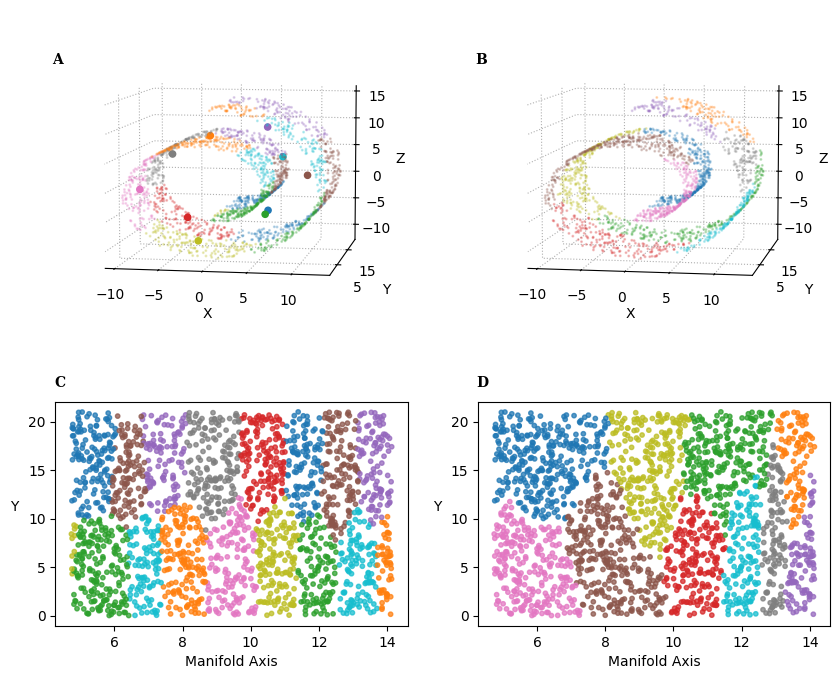

In [4]:
fig = plt.figure(figsize=(10, 8))

gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1.5, 1])
ax1 = fig.add_subplot(gs[0], projection='3d')
ax2 = fig.add_subplot(gs[1], projection='3d')
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

plot_roll(ax1, X, k_cluster)
plot_roll(ax2, X, s_cluster)

plot_manifold(ax3, X, t, k_cluster)
plot_manifold(ax4, X, t, s_cluster)

ax1.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
            c=range(n_clusters), alpha=1, cmap='tab10', marker='o')


for label, ax in zip(['A', 'B'], (ax1, ax2)):
    ax.text2D(
        0.05, 0.8, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', weight='bold', va='bottom', fontfamily='serif')

# Labels
for label, ax in zip(['C', 'D'], (ax3, ax4)):
    ax.text(
        0.075, 1.01, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', weight='bold', va='bottom', fontfamily='serif')

plt.savefig('Figure1.png', dpi=400)

In [5]:
kmeans = KMeans(n_clusters=20, random_state=42, n_init=100)
k_cluster = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

spectral = SpectralClustering(n_clusters=2, random_state=42, n_init=100)
s_cluster = spectral.fit_predict(X)

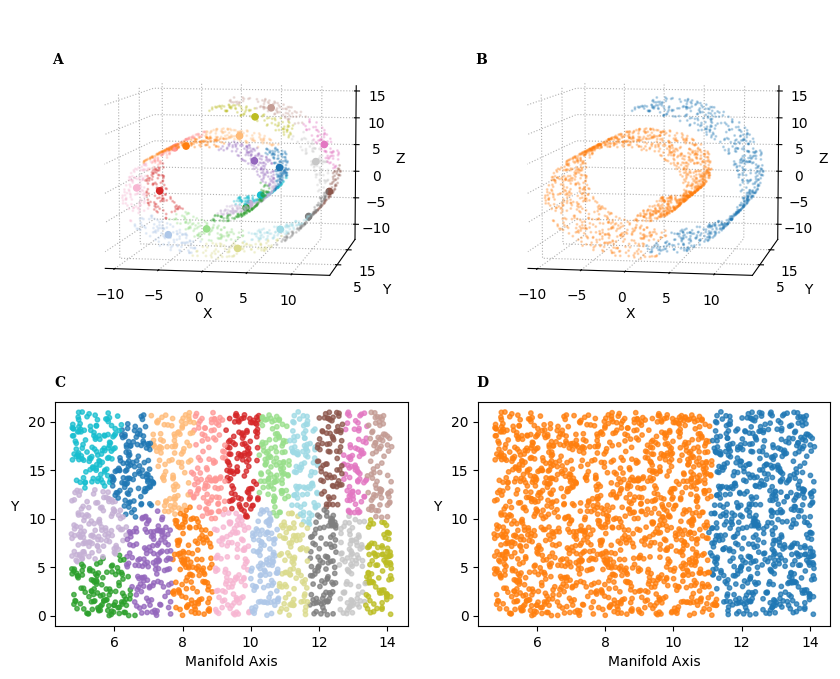

In [6]:
colors = ['#1F77B4', '#ff7f0e']
ppb.make_palette(colors, 3, '2color')

fig = plt.figure(figsize=(10, 8))

gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1.5, 1])
ax1 = fig.add_subplot(gs[0], projection='3d')
ax2 = fig.add_subplot(gs[1], projection='3d')
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

plot_roll(ax1, X, k_cluster, cmap='tab20')
plot_roll(ax2, X, s_cluster, cmap=ppb.get_cmap('2color'))

plot_manifold(ax3, X, t, k_cluster, cmap='tab20')
plot_manifold(ax4, X, t, s_cluster, cmap=ppb.get_cmap('2color'))

ax1.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
            c=range(20), alpha=1, cmap='tab20', marker='o')


for label, ax in zip(['A', 'B'], (ax1, ax2)):
    ax.text2D(
        0.05, 0.8, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', weight='bold', va='bottom', fontfamily='serif')

# Labels
for label, ax in zip(['C', 'D'], (ax3, ax4)):
    ax.text(
        0.075, 1.01, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', weight='bold', va='bottom', fontfamily='serif')

plt.savefig('Figure2.png', dpi=400)

In [11]:
def distance(A, b):
    return np.sum((A - b)**2, axis=1)**0.5


def k_medoids(X, k, medoids=[], best_l=float("inf"),
              delta=np.ones(len(X))*float("inf")):
    '''
    A simple and sweet algorthim for the BUILD phase PAM to solve K-Medoids
    '''
    # Base case
    if k == 0:
        return medoids, best_l

    # Find next best center
    for mu in X:
        r = np.minimum(distance(X, mu), delta)
        l = np.sum(r)
        # Save best values found so far
        if l < best_l:
            best_l, best_mu, best_r = l, mu, r

    # Note: The size of delta and X are note decreased (try using np.delete)
    return k_medoids(X, k-1, medoids=medoids+[best_mu], best_l=best_l, delta=best_r)

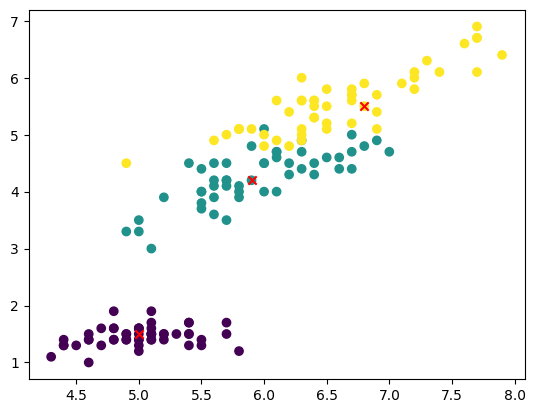

In [12]:
# Testing K-Medoids on Iris dataset

iris = datasets.load_iris()
X = iris['data']

medoids, loss = k_medoids(X, 3)

plt.scatter(X[:, 0], X[:, -2], c=iris['target'])
plt.scatter(np.array(medoids)[:, 0], np.array(medoids)[:, -2], c='red', marker='x')